
1.На занятиях мы работали с данными из по Covid-19 из двух источников.
Сконструируйте новый DataFrame содержащий отношения числа заболевших,
числа смертей их этих двух источников. Постройте диаграмму рассеяния по
полученным данным.

2.Средствами SymPy решить систему алгебраических уравнений:

${x^3}+x-{y^2}=a$

${x^2}-{y^2}=a$

Сколько решений у этой системы? Взять любое из этих решений и
построить графики зависимостей действительной и мнимой частей решения от a.

## Задание 1

In [6]:
import covid
import pandas as pd
import matplotlib.pyplot as plt


covid_world = covid.Covid(source='worldometers').get_data()
covid_hopkins = covid.Covid(source='john_hopkins').get_data()
df1 = pd.DataFrame(covid_world)
df2 = pd.DataFrame(covid_hopkins)
not_country = ('North America', 'Asia', 'South America', 'Europe', 'Africa', 'World', 'South Africa')
excluded1 = df1[~df1.country.isin(not_country)]
excluded2 = df2[~df2.country.isin(not_country)]

countries = list(set(excluded1.country) & set(excluded2.country))
w_d = list(excluded1[excluded1.country.isin(countries)].deaths)
h_d = list(excluded2[excluded2.country.isin(countries)].deaths)
w_c = list(excluded1[excluded1.country.isin(countries)].confirmed)
h_c = list(excluded2[excluded2.country.isin(countries)].confirmed)

df = pd.DataFrame({
    'country': countries,
    'worldometer_deaths': w_d,
    'hopkins_deaths': h_d,
    'worldometer_confirmed': w_c,
    'hopkins_confirmed': h_c
}).sort_values(by=['worldometer_deaths'], ascending=False)
df

,country,worldometer_deaths,hopkins_deaths,worldometer_confirmed,hopkins_confirmed
1,Slovakia,617838,617803,22213762,22213762
0,Portugal,477554,477554,34746838,34746838
2,Nicaragua,298222,292331,10241812,10064290
13,Luxembourg,297858,297863,3933386,3933351
19,Belgium,202225,202225,2265320,2265320
...,...,...,...,...,...
172,Liechtenstein,0,2,8,9
174,Brazil,0,1,4,7
175,Senegal,0,0,3,4
176,Czechia,0,0,1,3


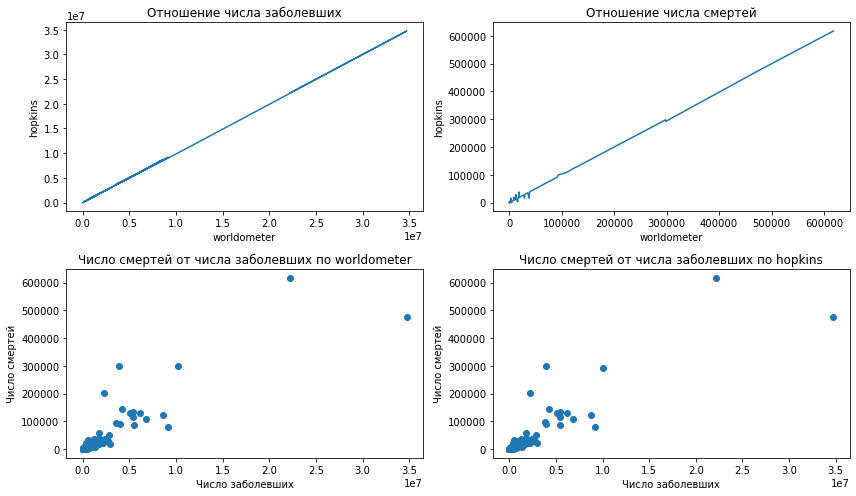

In [8]:
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.set_title('Отношение числа заболевших')
ax2.set_title('Отношение числа смертей')
ax3.set_title('Число смертей от числа заболевших по worldometer')
ax4.set_title('Число смертей от числа заболевших по hopkins')
ax1.plot(df.worldometer_confirmed, df.hopkins_confirmed)
ax2.plot(df.worldometer_deaths, df.hopkins_deaths)
ax3.scatter(df.worldometer_confirmed, df.worldometer_deaths)
ax4.scatter(df.hopkins_confirmed, df.hopkins_deaths)
ax1.set_xlabel('worldometer')
ax1.set_ylabel('hopkins')
ax2.set_xlabel('worldometer')
ax2.set_ylabel('hopkins')
ax3.set_xlabel('Число заболевших')
ax3.set_ylabel('Число смертей')
ax4.set_xlabel('Число заболевших')
ax4.set_ylabel('Число смертей')
plt.tight_layout()
plt.show()

## Задание 2

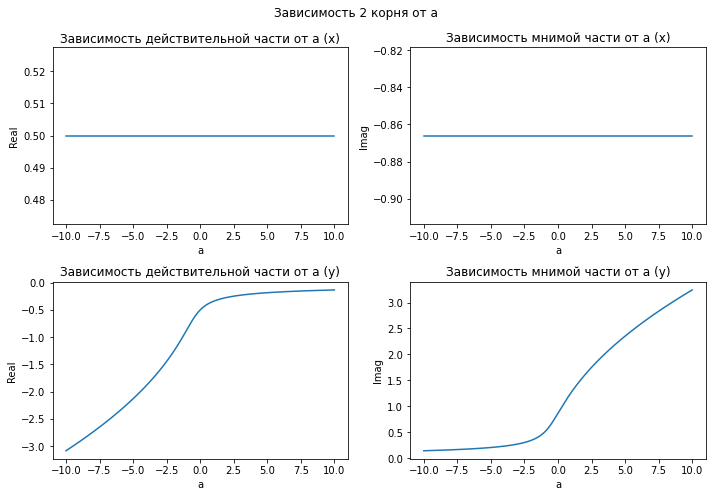

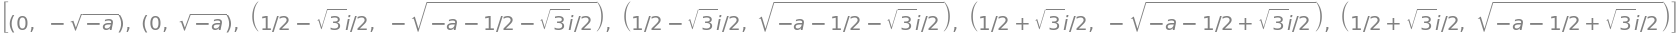

In [10]:
from sympy.abc import x, y, a
from sympy import solve, pretty_print, init_printing, lambdify
import numpy as np
import matplotlib.pyplot as plt
init_printing()


def draw(s, aa, n):
    x, y = s[n][0], s[n][1]
    fig = plt.figure(figsize=(10, 7))
    fig.suptitle(f'Зависимость {n} корня от а')
    ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
    ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)
    ax1.set_title('Зависимость действительной части от а (x)')
    ax2.set_title('Зависимость мнимой части от а (x)')
    ax3.set_title('Зависимость действительной части от а (y)')
    ax4.set_title('Зависимость мнимой части от а (y)')
    ax1.set_xlabel('a'), ax2.set_xlabel('a')
    ax3.set_xlabel('a'), ax4.set_xlabel('a')
    ax1.set_ylabel('Real'), ax2.set_ylabel('Imag')
    ax3.set_ylabel('Real'), ax4.set_ylabel('Imag')
    xs = lambdify(a, x, 'numpy')(aa + 0j)
    ys = lambdify(a, y, 'numpy')(aa + 0j)
    ax1.plot(aa, np.full(len(aa), xs.real)), ax2.plot(aa, np.full(len(aa), xs.imag)) # Первый корень не зависит от а
    ax3.plot(aa, ys.real), ax4.plot(aa, ys.imag)
    plt.tight_layout()
    plt.show()



aa = np.linspace(-10, 10, 1000)
eqs = [x**3 + x - y**2 - a, x**2 - y**2 - a]
s = solve(eqs, (x, y)) # 6 пар решений
n = 2
draw(s, aa, n)
s